In [107]:
# pip install wandb
! pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier

In [2]:
readIn = pd.read_csv("data/train_df.csv")
train_df = pd.DataFrame(readIn)

In [3]:
readIn = pd.read_csv("data/res_df.csv")
df = pd.DataFrame(readIn)

In [4]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [9]:
train_df['target'].value_counts()

target
0    432017
1      5005
Name: count, dtype: int64

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
# Bemenő változók és célváltozó meghatározása
bemenő_változók = df.columns.drop(['BORROWER_ID', 'target'])  # Az összes oszlop, kivéve a 'BORROWER_ID' és 'target'

#bemenő_változók=['CONTRACT_CREDIT_LOSS_SUM','CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN','CONTRACT_INCOME_SUM','CONTRACT_INSTALMENT_AMOUNT_MEAN','CONTRACT_INTEREST_RATE_MEAN','CONTRACT_LGD_SUM','CONTRACT_LOAN_AMOUNT_SUM','CONTRACT_MORTGAGE_LENDING_VALUE_SUM','BORROWER_COUNTY_6.0','BORROWER_COUNTY_84.0','BORROWER_COUNTY_114.0','BORROWER_COUNTY_163.0','BORROWER_COUNTY_181.0','BORROWER_TYPE_OF_SETTLEMENT_3.0','CONTRACT_BANK_ID_1d42bbf5','CONTRACT_BANK_ID_2c6f5579','CONTRACT_BANK_ID_3b3b8a5e','CONTRACT_BANK_ID_41562c5f','CONTRACT_BANK_ID_c8072c06','CONTRACT_BANK_ID_caa130b5','CONTRACT_BANK_ID_dfce4aec','CONTRACT_CREDIT_INTERMEDIARY_1.0','CONTRACT_CREDIT_INTERMEDIARY_20001.0','CONTRACT_CURRENCY_14','CONTRACT_FREQUENCY_TYPE_3265c5b7','CONTRACT_FREQUENCY_TYPE_ad534644','CONTRACT_LOAN_CONTRACT_TYPE_1','CONTRACT_LOAN_CONTRACT_TYPE_2','CONTRACT_LOAN_CONTRACT_TYPE_11','CONTRACT_LOAN_TYPE_5a06241e','CONTRACT_LOAN_TYPE_83910425','CONTRACT_LOAN_TYPE_b503a0de','CONTRACT_LOAN_TYPE_d3aaffde','CONTRACT_LOAN_TYPE_eab72d7a','CONTRACT_REFINANCED_2.0','CONTRACT_REFINANCED_10001.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0' ]

X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# model = RandomForestClassifier(random_state=22, n_estimators= 150, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')

# param_grid = {
#     'n_estimators': [80, 100, 130],
#     'max_depth': [5, 10, 20],
#     # 'min_samples_split': [2, 5, 10],
#     'max_features': ['auto', 'sqrt', 'log2'],
# }

# # model.fit(X,y)

In [ ]:
# # Modell inicializálása és illesztése az adatokra
# model = GradientBoostingClassifier(n_estimators=200, max_depth=10, random_state=22, learning_rate=0.01)

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_log_loss')

In [ ]:
print("Legjobb hiperparaméter-kombináció:", grid_search.best_params_)
print("Legjobb logloss:", grid_search.best_score_)

In [ ]:
# for i in range(0, len(X), batch_size):

#     print(f'Processing {i}', end='\r')
#     X_batch = X[i:i+batch_size]
#     y_batch = y[i:i+batch_size]

#     # Modell tanítása a batch-en
#     model.fit(X_batch, y_batch)

In [ ]:
# model = GradientBoostingClassifier(n_estimators=130, max_depth=5, random_state=22, learning_rate=0.03)

In [108]:
import lightgbm as lgb

In [91]:
X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó

In [14]:
model = RandomForestClassifier(random_state=22, n_estimators= 110, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')
# model = RandomForestClassifier(random_state=22, n_estimators= 100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')

# model = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=22, min_samples_split=5, min_samples_leaf=2,max_features='log2', learning_rate=0.01)

In [15]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=110, random_state=22)

# SAVING RESULTS

In [16]:
merged_df = df[df['BORROWER_ID'].isin(df_target['BORROWER_ID'])]

In [17]:
# X_2 = merged_df[bemenő_változók]

In [15]:
X_scaled = scaler.fit_transform(X_2)

In [ ]:
merged_df['predicted_target'] = model.predict_proba(X_scaled)[:,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
cols=['BORROWER_ID', 'predicted_target']

res=merged_df[cols]

In [ ]:
res.columns=['BORROWER_ID', 'PRED']

In [ ]:
#best so far: 0.01065148585696977
# ebben nem vagyok biztos: 0.011489444435447733

res['PRED'].mean()

In [20]:
print(res.shape)
res.to_csv('data/results-newday.csv', index=False)

(1117674, 2)


<Axes: >

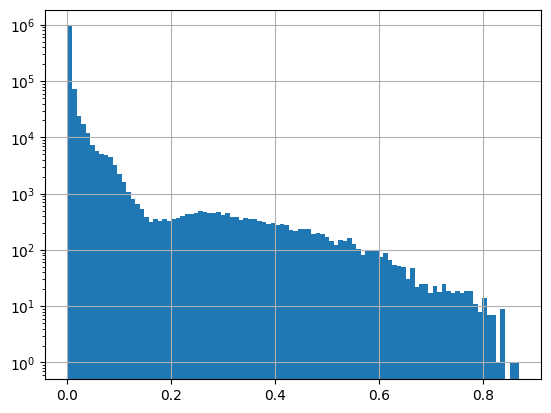

In [22]:
res['PRED'].hist(bins=100, log=True)

In [6]:
df1 = pd.read_csv('data/szentek csarnoka/results_top2-better.csv')
df2 = pd.read_csv('data/results-top2-new-scaled.csv')

In [19]:
df3['p']=df1['PRED']-df2['PRED']

<Axes: >

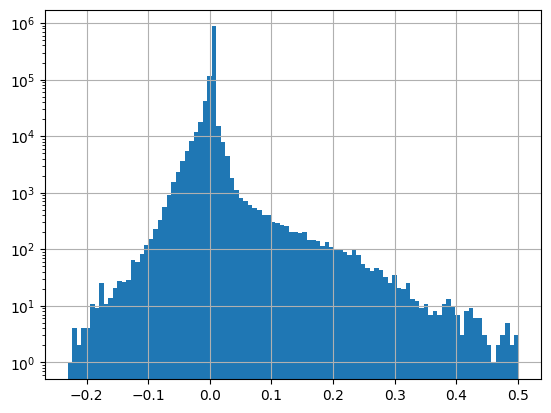

In [21]:
df3['p'].hist(bins=100, log=True)

In [25]:
df4= df3[abs(df3['p']<0.1].describe()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [17]:
df1['PRED'].mean()

0.009501926990743443

In [47]:
merge=pd.merge(df1, res, on='BORROWER_ID', how='inner')

In [57]:
merge.sample(20)

,BORROWER_ID,PRED_x,PRED_y
919101,8N1VYddp,0.019501,0.019501
608912,x6vUN9hR,0.002914,0.002914
429687,C+r75v5f,0.039944,0.039944
927777,ydHERJ7o,0.000784,0.000784
241212,PyfvkHR+,0.002055,0.002055
732168,1kATg82+,0.000286,0.000286
980834,RbyK6GUo,0.000233,0.000233
565787,9eHkEjnu,0.000770,0.000770
907223,YU42HHkQ,0.001048,0.001048
799673,qgsYC7+D,0.021491,0.021491


In [52]:
hasonlosag_szazalek

1.4783380484828312

In [36]:
multi = 0.0148/res['PRED'].mean()
res['PRED']=res['PRED']*multi

C:\Users\User\AppData\Local\Temp\ipykernel_11356\2399676423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['PRED']=res['PRED']*multi


In [37]:
print(res.shape)
res.to_csv('data/results.csv', index=False)

(1117674, 2)


In [ ]:
i1=importance

In [ ]:
importance = gbm.feature_importances_

with open('fontossagok.txt', 'w') as file:
    for i, val in enumerate(importance):
        print(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}")
        file.write(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}\n")

with open('fontossagok-tomb.txt', 'w') as file:
    for i, val in enumerate(importance):
        if (val>0):
            file.write(f"'{bemenő_változók[i]}',")

In [ ]:
# print(res.shape)
# res.to_csv('data/results2.csv', index=False)

In [ ]:
len(bemenő_változók)

In [ ]:
imp=[]
imp2=[]
for i in range(len(i1)):
    if(i1[i]>0):
        imp.append(i1[i])

for i in range(len(importance)):
    imp2.append(importance[i])

In [ ]:
imp

In [ ]:
imp2

In [ ]:
for i in range(len(importance)):
    print(imp[i]-importance[i])

In [5]:
import operator

column_importance = {
    'CONTRACT_CREDIT_LOSS_SUM': 0.16910412766343422,
    'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN': 0.0010854199994039476,
    'CONTRACT_INCOME_SUM': 0.00016402107884890086,
    'CONTRACT_INSTALMENT_AMOUNT_MEAN': 0.031180862589240545,
    'CONTRACT_INTEREST_RATE_MEAN': 0.030192901911618403,
    'CONTRACT_LGD_SUM': 0.0325214105387914,
    'CONTRACT_LOAN_AMOUNT_SUM': 0.059547996438097175,
    'CONTRACT_MORTGAGE_LENDING_VALUE_SUM': 0.0,
    'BORROWER_COUNTY_6.0': 0.0005365996241172926,
    'BORROWER_COUNTY_84.0': 6.109712470258696e-05,
    'BORROWER_COUNTY_114.0': 9.897689643537617e-05,
    'BORROWER_COUNTY_163.0': 0.00019303156699422723,
    'BORROWER_COUNTY_181.0': 0.00016810538899377636,
    'BORROWER_TYPE_OF_SETTLEMENT_3.0': 0.0004964242038491479,
    'CONTRACT_BANK_ID_1d42bbf5': 0.02072295988285964,
    'CONTRACT_BANK_ID_2c6f5579': 0.015205379415055013,
    'CONTRACT_BANK_ID_3b3b8a5e': 0.0025394648772917995,
    'CONTRACT_BANK_ID_41562c5f': 0.000331062561971647,
    'CONTRACT_BANK_ID_c8072c06': 0.01539687105066358,
    'CONTRACT_BANK_ID_caa130b5': 0.01534073692598546,
    'CONTRACT_BANK_ID_dfce4aec': 0.001707396711430799,
    'CONTRACT_CREDIT_INTERMEDIARY_1.0': 0.0006397696888633114,
    'CONTRACT_CREDIT_INTERMEDIARY_20001.0': 0.07940693730027754,
    'CONTRACT_CURRENCY_14': 0.0004959617374286843,
    'CONTRACT_FREQUENCY_TYPE_3265c5b7': 0.032039941764354374,
    'CONTRACT_FREQUENCY_TYPE_ad534644': 0.0019382207639447467,
    'CONTRACT_LOAN_CONTRACT_TYPE_1': 0.005183842232022988,
    'CONTRACT_LOAN_CONTRACT_TYPE_2': 0.002683927949735623,
    'CONTRACT_LOAN_CONTRACT_TYPE_11': 0.0013724299685780837,
    'CONTRACT_LOAN_TYPE_5a06241e': 0.2193531725654373,
    'CONTRACT_LOAN_TYPE_83910425': 0.07409743147205664,
    'CONTRACT_LOAN_TYPE_b503a0de': 0.0011494721200213294,
    'CONTRACT_LOAN_TYPE_d3aaffde': 0.03253124500133724,
    'CONTRACT_LOAN_TYPE_eab72d7a': 0.007576329008210865,
    'CONTRACT_REFINANCED_2.0': 0.0016514849246236352,
    'CONTRACT_REFINANCED_10001.0': 0.0360400486606488,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0': 0.021648224094653966,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0': 0.0007009618289603967,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0': 0.025900482687704014,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0': 0.052892616142717494,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0': 0.006102653638637873
}

# Rendezés a fontossági értékek alapján csökkenő sorrendben
sorted_columns = sorted(column_importance.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')

CONTRACT_LOAN_TYPE_5a06241e: 0.2193531725654373
CONTRACT_CREDIT_LOSS_SUM: 0.16910412766343422
CONTRACT_CREDIT_INTERMEDIARY_20001.0: 0.07940693730027754
CONTRACT_LOAN_TYPE_83910425: 0.07409743147205664
CONTRACT_LOAN_AMOUNT_SUM: 0.059547996438097175
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0: 0.052892616142717494
CONTRACT_REFINANCED_10001.0: 0.0360400486606488
CONTRACT_LOAN_TYPE_d3aaffde: 0.03253124500133724
CONTRACT_LGD_SUM: 0.0325214105387914
CONTRACT_FREQUENCY_TYPE_3265c5b7: 0.032039941764354374
CONTRACT_INSTALMENT_AMOUNT_MEAN: 0.031180862589240545
CONTRACT_INTEREST_RATE_MEAN: 0.030192901911618403
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0: 0.025900482687704014
CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0: 0.021648224094653966
CONTRACT_BANK_ID_1d42bbf5: 0.02072295988285964
CONTRACT_BANK_ID_c8072c06: 0.01539687105066358
CONTRACT_BANK_ID_caa130b5: 0.01534073692598546
CONTRACT_BANK_ID_2c6f5579: 0.015205379415055013
CONTRACT_LOAN_TYPE_eab72d7a: 0.007576329008210865
CONTRACT_TYPE_OF_INTERES